In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing libraries

# Data Gathering

In [12]:
data=pd.read_csv("C:\internships\oasisinfobyte\iris flower data set\Iris.csv") #taking file
data.shape   #checking how many rows and coloumns are there in the data where csv iris file is assigned

(150, 6)

In [13]:
data.info()    #information about the Csvfile

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
data.duplicated().sum()            #checking duplication

0

In [15]:
df=data.drop(["Id"],axis = 1)      #droping Id Coloumn
print(df.shape)

(150, 5)


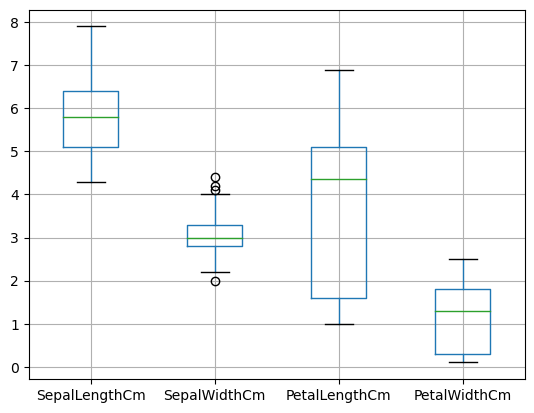

In [16]:
df.boxplot()
plt.show()

In [17]:
Q1=df['SepalWidthCm'].quantile(0.25)     
Q3=df['SepalWidthCm'].quantile(0.75)

IQR= Q3 - Q1

lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

filtered_df=df[(df['SepalWidthCm'] >= lower_bound) & (df['SepalWidthCm'] <= upper_bound)]
filtered_df.shape
#Calculate the Interquartile Range (IQR) and define lower and upper bounds.
#Create a filtered dataset by removing outliers in the 'SepalWidthCm' column.''

(146, 5)

In [18]:
filtered_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Model training

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [20]:
X=filtered_df.drop('Species',axis=1)
y=filtered_df['Species']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(116, 4)
(30, 4)
(116,)
(30,)


In [22]:
cls_model = LogisticRegression()

In [23]:
cls_model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred=cls_model.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [26]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30

